In [339]:
import pandas as pd 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import  GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC 

In [340]:
%%javascript
    IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

### Read all Data
Read train data and the prediction data

In [341]:
data = pd.read_csv("train.csv")
pd.set_option('display.max_columns',100)
data_predict = pd.read_csv("covtype.data" , header = None)
print ( data_predict.shape , data.shape)

(581012, 55) (15120, 56)


### Data Split

Split the data into train , develop , predict . All EDA will be done on the train data.

In [342]:
X = np.array(data.as_matrix(columns=data.columns[1:55]))
Y = np.array(data["Cover_Type"].tolist())
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]
train_df = data.iloc[shuffle,:].iloc[:12000 , :]
print('data shape: ', X.shape)
print('label shape:', Y.shape)
test_data, test_labels = X[13000:], Y[13000:]
dev_data, dev_labels = X[12000:13000], Y[12000:13000]
train_data, train_labels = X[:12000], Y[:12000]

data shape:  (15120, 54)
label shape: (15120,)


### EDA

#### Step 1 : Describe the train data

In [343]:
display(train_df.describe())

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,7581.787167,2750.016833,155.998000,16.554583,228.146500,51.272583,1709.456667,212.648333,218.912250,135.060000,1506.198917,0.234333,0.033167,0.422000,0.310500,0.023833,0.041250,0.063583,0.055250,0.010583,0.043833,0.0,0.0,0.000583,0.142250,0.026667,0.013833,0.031333,0.012083,0.0,0.007417,0.040083,0.003833,0.00275,0.008750,0.000917,0.024333,0.048917,0.015833,0.000083,0.003833,0.001000,0.000750,0.082833,0.048417,0.021667,0.045500,0.042417,0.001417,0.006167,0.000750,0.002250,0.049250,0.045333,0.030417,4.005583
std,4351.327825,419.642108,109.927813,8.438876,211.490399,61.145760,1317.495043,30.657498,22.791662,46.031187,1096.185398,0.423599,0.179079,0.493899,0.462718,0.152536,0.198876,0.244019,0.228477,0.102334,0.204733,0.0,0.0,0.024146,0.349321,0.161114,0.116804,0.174224,0.109263,0.0,0.085804,0.196163,0.061798,0.05237,0.093135,0.030264,0.154088,0.215703,0.124836,0.009129,0.061798,0.031608,0.027377,0.275642,0.214654,0.145599,0.208407,0.201546,0.037614,0.078289,0.027377,0.047383,0.216399,0.208043,0.171738,2.005547
min,1.000000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3810.250000,2375.000000,64.000000,10.000000,67.000000,5.000000,759.000000,196.000000,207.000000,106.000000,726.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7618.000000,2751.000000,125.000000,15.000000,180.000000,33.000000,1317.000000,220.000000,222.000000,138.000000,1253.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

Following is what we observe:
1. All fields are continous or binary. There are no text fields 
2. Soil_Type fields are binary
3. Wilderness Area fields are binary
4. Following are the fields which are continous : 'Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways','Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points'

We create the scatter plots for the continous fields

#### Step 2 : Scatter plot for continous fields

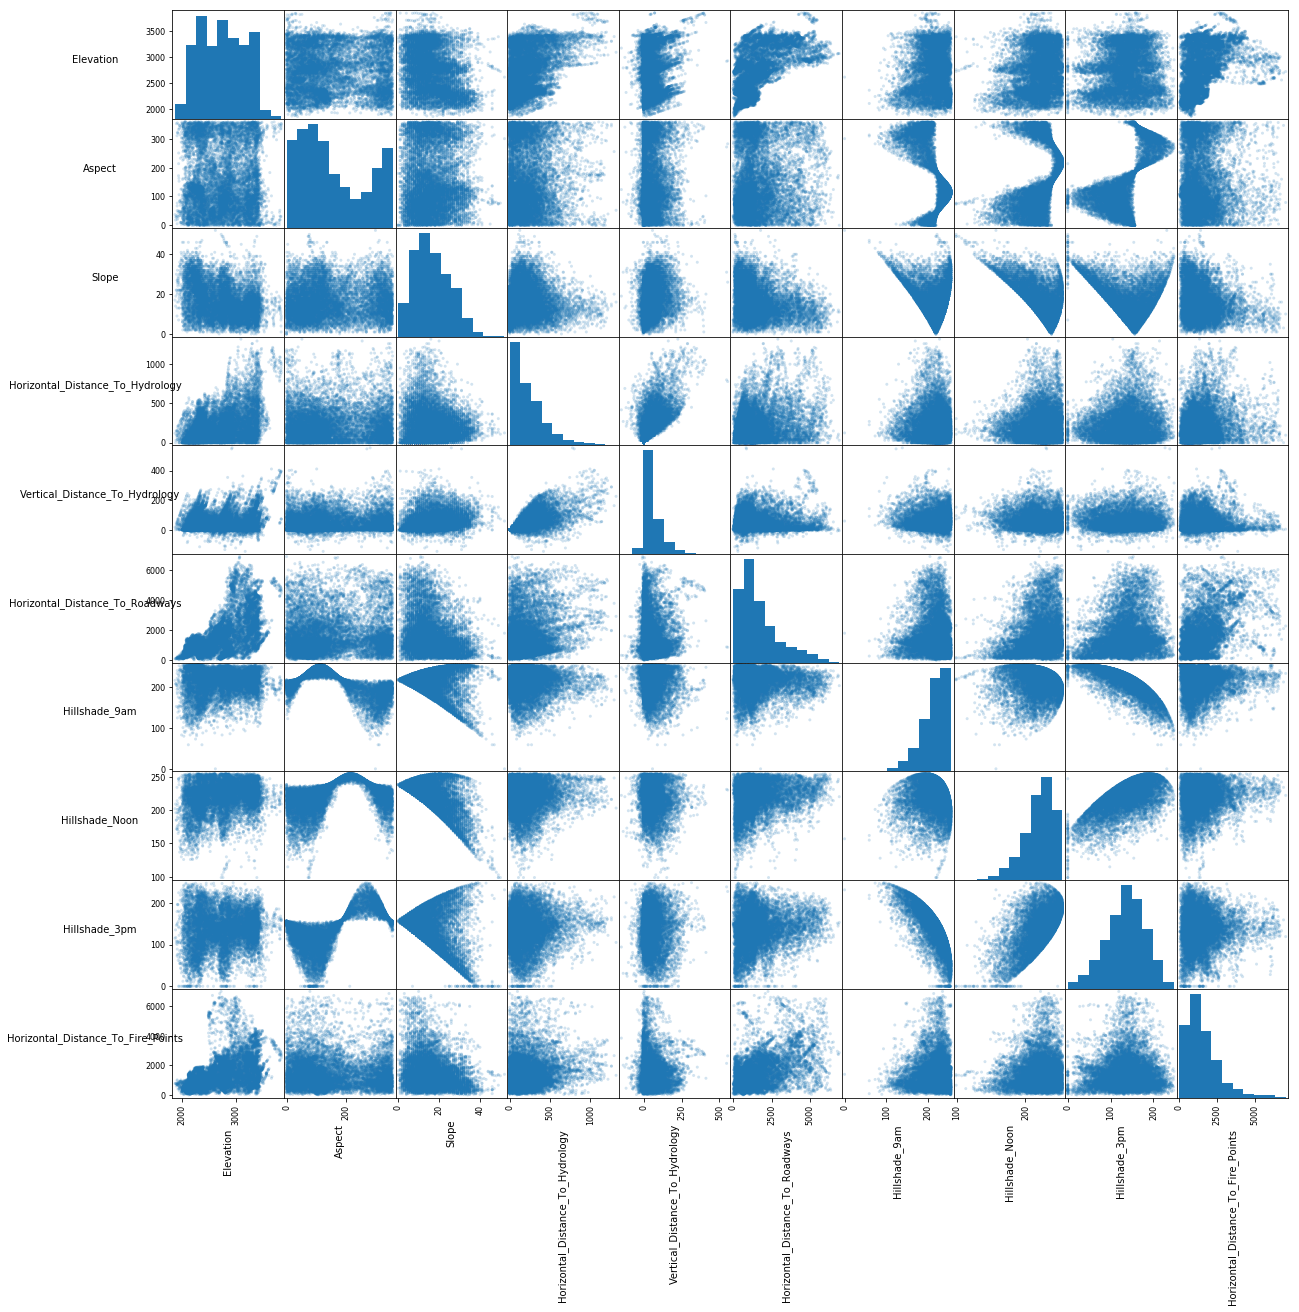

In [344]:
plot_temp = train_df[['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']]
axs = pd.plotting.scatter_matrix(plot_temp,alpha=0.2,figsize=(20, 20))
n = len(plot_temp.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50
plt.show()

Followin are the observations :
1. The graph shows that there is a correlation between Hillshade_3PM , Hillshade_9AM , Hillshade_Noon , although it is not linear
2. Also Hillshade_3PM , Hillshade_9AM , Hillshade_Noon seems to be correlated to Aspect , although it is not linear.
3. Also Hillshade_3PM , Hillshade_9AM , Hillshade_Noon seems to be correlated to Slope , although it is not linear.
4. Log of Horizontal_Distance_To_Hydrology , Horizontal_Distance_To_Fire_Points , Horizontal_Distance_To_Roadways

#### Step 3 : Count zero and NA values

In [346]:
def count_non_zero_for_a_column(train_df, column_name):
    count_obj = train_df.apply(lambda x: True if x[column_name] == 0 else False , axis=1)
    no_rows = len(count_obj[count_obj == True].index)
    print ( column_name , ' : ' , no_rows )
print ("\033[1m" , 'Count of zero rows by column :' , "\033[0;0m")
column_list = ['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
for column_name in column_list:
    count_non_zero_for_a_column(train_df, column_name)
print ("\033[1m" , 'Count of NA rows by column :' , "\033[0;0m")    
print (train_df.count(axis = 0)   ) 

 Count of zero rows by column : 
Elevation  :  0
Aspect  :  89
Slope  :  5
Horizontal_Distance_To_Hydrology  :  1261
Vertical_Distance_To_Hydrology  :  1493
Horizontal_Distance_To_Roadways  :  3
Hillshade_9am  :  1
Hillshade_Noon  :  0
Hillshade_3pm  :  75
Horizontal_Distance_To_Fire_Points  :  1
 Count of NA rows by column : 
Id                                    12000
Elevation                             12000
Aspect                                12000
Slope                                 12000
Horizontal_Distance_To_Hydrology      12000
Vertical_Distance_To_Hydrology        12000
Horizontal_Distance_To_Roadways       12000
Hillshade_9am                         12000
Hillshade_Noon                        12000
Hillshade_3pm                         12000
Horizontal_Distance_To_Fire_Points    12000
Wilderness_Area1                      12000
Wilderness_Area2                      12000
Wilderness_Area3                      12000
Wilderness_Area4                      12000
Soil_Type1 

Following are what we observe :
1. There are no NA values in any column
2. Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology are zero for more than 10% of the data points.
    

### Solution Approaches

#### Approach 1 
1. Without transformation fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
2. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 2 
1. Tranform the train data continous features with Min Max Scaler
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 3 
1. Tranform the train data continous features with Robust Scaler
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 4 
1. Tranform the train data using PCA
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

#### Approach 5 
1. Tranform the train data continous features taking log for relevant fields
2. Ffit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data . Get the best accuracy in test data.
3. Get the most important features from Decision Tree model and fit Decission Tree , Random Forest , KNN , Naive Bayes , Logistic Regression , Gradient Boosting to the train data passing only the important feature. Get the best accuracy in test data.

### Reusable Algorithm Code

In [347]:
warnings.filterwarnings(action='ignore')  

#### Logistic Regression

In [348]:
def classify_logistic_regression(train_data , train_labels , dev_data , dev_labels ):
    print ( "\033[1m" ,  "Logistic Regression " , "\033[0;0m" )
    C_values= { 'C' : [ 0.01, 0.05 , 0.1,  1.0,10.0]}
    grd_model = GridSearchCV( LogisticRegression(penalty='elasticnet', solver='saga' , l1_ratio =0),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model

#### Decission Tree

In [349]:
def classify_decision_tree (train_data , train_labels , dev_data , dev_labels  ):
    print ( "\033[1m" ,  "Decision Tree " , "\033[0;0m" )
    C_values= { 'max_depth' : [20,25 , 35,40,50 , 60 , 80] , 'random_state' : [ 0 ,1 , 2]}
    grd_model = GridSearchCV( DecisionTreeClassifier(),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model

#### Random Forest

In [350]:
def classify_random_forest (train_data , train_labels , dev_data , dev_labels  ):
    print ( "\033[1m" ,  "Random Forest " , "\033[0;0m" )
    C_values= { 'max_depth' : [5, 10 , 15 ] , 'n_estimators' : [ 20, 30 , 40 ,50 , 200 , 300 , 500 , 1000] , 'min_samples_leaf': [10,50,100,200,500]  }
    grd_model = GridSearchCV( RandomForestClassifier(random_state=1 , n_jobs = 4 , bootstrap = False ),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model 

#### KNN

In [351]:
def classify_KNN (train_data , train_labels , dev_data , dev_labels  ):
    print ( "\033[1m" ,  "K Nearest Neighbour" , "\033[0;0m" )
    C_values = { 'n_neighbors' : [1, 3, 5, 7, 9] }
    grd_model = GridSearchCV( KNeighborsClassifier(),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model

#### Gradient Boosting

In [352]:
def classify_gradient_boosting(train_data , train_labels , dev_data , dev_labels  ):
    print ( "\033[1m" ,  "Gradient Boosting" , "\033[0;0m" )
    C_values= { 'max_depth' : [20,25 , 35,40,50 , 60 , 80] , 'n_estimators' : [ 10, 20 , 30 , 40 ,50 ,60]}
    grd_model = GridSearchCV( GradientBoostingClassifier(),  param_grid = C_values ,return_train_score = 1)
    grd_model.fit(train_data,train_labels)
    print ("Best fit parameters :")
    print (grd_model.best_params_)
    print ("Best fit model F1 score :")
    predicted= grd_model.predict(dev_data)
    print(metrics.f1_score(dev_labels, predicted , average='micro')) 
    return grd_model

#### Scale continous variables

In [353]:
def fit_all_data_scalers(column_list , scaler_type ,  train_data , test_data , dev_data ):
    for column_name in column_list:
        if scaler_type == 'MinMax' :
            scaler = MinMaxScaler()
        if scaler_type == 'Robust':
            scaler = RobustScaler()
        else:
            scaler = StandardScaler()
        column_index = train_df.columns.get_loc(column_name) - 1
        train_data[:,column_index] = scaler.fit_transform(train_data[:,column_index].reshape(-1,1)).reshape(-1)
        test_data[:,column_index] =  (scaler.transform(test_data[:,column_index].reshape(-1,1)).reshape(-1))
        dev_data[:,column_index] =  (scaler.transform(dev_data[:,column_index].reshape(-1,1)).reshape(-1))
    return train_data , test_data , dev_data 

#### Run all algorithms

In [354]:
def run_all_algorithms (train_data , train_labels , dev_data , dev_labels ):
    # Run KNN
    grd_model_knn = classify_KNN(train_data , train_labels , dev_data , dev_labels ) 
    predicted = grd_model_knn.predict(dev_data)
    print ('Classification Report :')
    print (classification_report(predicted,dev_labels ))
    print ('Confusion Matrix :')
    print (confusion_matrix(predicted,dev_labels ))
    # Run Logistic Regression
    grd_model_lr = classify_logistic_regression(train_data , train_labels , dev_data , dev_labels ) 
    predicted = grd_model_lr.predict(dev_data)
    print ('Classification Report :')
    print (classification_report(predicted,dev_labels ))
    print ('Confusion Matrix :')
    print (confusion_matrix(predicted,dev_labels ))   
    # Run Decission Tree
    grd_model_dt = classify_decision_tree(train_data , train_labels , dev_data , dev_labels )  
    predicted = grd_model_dt.predict(dev_data)
    print ('Classification Report :')
    print (classification_report(predicted,dev_labels ))
    print ('Confusion Matrix :')
    print (confusion_matrix(predicted,dev_labels ))
    # Run Random Forest
    grd_model_rf = classify_random_forest(train_data , train_labels , dev_data , dev_labels )
    predicted = grd_model_rf.predict(dev_data)
    print ('Classification Report :')
    print (classification_report(predicted,dev_labels ))
    print ('Confusion Matrix :')
    print (confusion_matrix(predicted,dev_labels ))  
    return grd_model_knn , grd_model_lr , grd_model_dt , grd_model_rf 

 ### Approach 1

In [355]:
test_data, test_labels = X[13000:], Y[13000:]
dev_data, dev_labels = X[12000:13000], Y[12000:13000]
train_data, train_labels = X[:12000], Y[:12000]

Run all algorithms and check accuracy on dev data . Also check the confusion matrix and accuracy per class. Validate  accuracy on test data.

In [356]:
grd_model_knn , grd_model_lr , grd_model_dt ,   grd_model_rf    = run_all_algorithms (train_data , train_labels , dev_data , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.847
Classification Report :
              precision    recall  f1-score   support

           1       0.72      0.67      0.69       135
           2       0.63      0.79      0.70       136
           3       0.80      0.89      0.84       141
           4       0.96      0.94      0.95       142
           5       0.98      0.84      0.91       154
           6       0.92      0.86      0.89       154
           7       0.98      0.92      0.95       138

    accuracy                           0.85      1000
   macro avg       0.86      0.85      0.85      1000
weighted avg       0.86      0.85      0.85      1000

Confusion Matrix :
[[ 91  41   0   0   0   0   3]
 [ 21 108   5   0   1   1   0]
 [  0   6 126   1   1   7   0]
 [  0   0   6 134   0   2   0]
 [  4  14   6   0 129   1   0]
 [  1   2  15   4   0 132   0]
 [ 10   1   0   0   0   0 127]]
 Logistic Regression  
Best fit parameters :
{'

The accuracy is highest in KNN followed by Random Forest. F1 score is low for Class 1 and 2 . Also from the confusion matrix it is clear that the algorithms are most confused between class 1 and 2 
We run the algorithms with the top 10 important features from decision tree

In [357]:
top_10_estimators = np.argsort(grd_model_dt.best_estimator_.feature_importances_)[::-1][0:10]
grd_model_knn_new , grd_model_lr_new , grd_model_dt_new ,  grd_model_rf_new = run_all_algorithms (train_data[:,top_10_estimators] , train_labels , dev_data[:,top_10_estimators] , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 1}
Best fit model F1 score :
0.847
Classification Report :
              precision    recall  f1-score   support

           1       0.72      0.67      0.69       135
           2       0.63      0.79      0.70       136
           3       0.80      0.89      0.84       141
           4       0.96      0.94      0.95       142
           5       0.98      0.84      0.91       154
           6       0.92      0.86      0.89       154
           7       0.98      0.92      0.95       138

    accuracy                           0.85      1000
   macro avg       0.86      0.85      0.85      1000
weighted avg       0.86      0.85      0.85      1000

Confusion Matrix :
[[ 91  41   0   0   0   0   3]
 [ 21 108   5   0   1   1   0]
 [  0   6 126   1   1   7   0]
 [  0   0   6 134   0   2   0]
 [  4  14   6   0 129   1   0]
 [  1   2  15   4   0 132   0]
 [ 10   1   0   0   0   0 127]]
 Logistic Regression  
Best fit parameters :
{'

The accuracy for KNN remains the same while for all models the accuracy reduces. We predict on the train data for the following models :

1. KNN with all features
2. Random Forest with all features
3. KNN with the 10 features

In [317]:
print ( "\033[1m" ,  "KNN with test predictions all features : " , "\033[0;0m" )
predicted= grd_model_knn.predict(test_data)
print(metrics.f1_score(test_labels, predicted , average='micro')) 

print ( "\033[1m" ,  "Random Forest with test predictions all features : " , "\033[0;0m" )
predicted= grd_model_rf.predict(test_data)
print(metrics.f1_score(test_labels, predicted , average='micro')) 

print ( "\033[1m" ,  "KNN with test predictions with 10 important features : " , "\033[0;0m" )
predicted= grd_model_knn_new.predict(test_data[:,top_10_estimators])
print(metrics.f1_score(test_labels, predicted , average='micro')) 

 KNN with test predictions all features :  
0.8349056603773584
 Random Forest with test predictions all features :  
0.8254716981132075
 KNN with test predictions with 10 important features :  
0.8349056603773584


We get the highest accuracy for KNN

 ### Approach 2

Using min max scalar for the continous features

In [320]:
test_data, test_labels = X[13000:], Y[13000:]
dev_data, dev_labels = X[12000:13000], Y[12000:13000]
train_data, train_labels = X[:12000], Y[:12000]
scaler_type == 'MinMax'
train_data , test_data , dev_data = fit_all_data_scalers(column_list , scaler_type ,  train_data , test_data , dev_data )
grd_model_knn , grd_model_lr , grd_model_dt , grd_model_rf   = run_all_algorithms (train_data , train_labels , dev_data , dev_labels )

The accuracy drops with scaling the data

 ### Approach 3

Using robust scalar for the continous features

In [323]:
test_data, test_labels = X[13000:], Y[13000:]
dev_data, dev_labels = X[12000:13000], Y[12000:13000]
train_data, train_labels = X[:12000], Y[:12000]
scaler_type == 'Robust'
train_data , test_data , dev_data = fit_all_data_scalers(column_list , scaler_type ,  train_data , test_data , dev_data )
grd_model_knn , grd_model_lr , grd_model_dt ,  grd_model_rf    = run_all_algorithms (train_data , train_labels , dev_data , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 9}
Best fit model F1 score :
0.663
Classification Report :
              precision    recall  f1-score   support

           1       0.48      0.51      0.50       116
           2       0.36      0.54      0.43        90
           3       0.57      0.65      0.60       124
           4       0.85      0.77      0.81       164
           5       0.82      0.64      0.72       205
           6       0.61      0.61      0.61       145
           7       0.89      0.82      0.85       156

    accuracy                           0.66      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.69      0.66      0.67      1000

Confusion Matrix :
[[ 59  42   0   0   7   0   8]
 [ 22  49   1   0  11   2   5]
 [  0   3  80   6   3  32   0]
 [  0   0  26 127   0  11   0]
 [ 21  29  10   0 131  12   2]
 [  0   7  24  17   7  89   1]
 [ 20   7   0   0   1   0 128]]
 Logistic Regression  
Best fit parameters :
{'

The accuracy drops with scaling the data

 ### Approach 4

Fit PCA on train data and fit model on the PCA

In [324]:
test_data, test_labels = X[13000:], Y[13000:]
dev_data, dev_labels = X[12000:13000], Y[12000:13000]
train_data, train_labels = X[:12000], Y[:12000]
pca = PCA(n_components=50)
pca.fit(train_data)
df_pca = pd.DataFrame()
df_pca['K Principal Components'] = np.arange(start=1 , stop=51)
df_pca['Explained Variance'] = pd.Series(pca.explained_variance_ratio_)
df_pca['Cumulative Explained Variance'] = pd.Series(np.cumsum(pca.explained_variance_ratio_))
display(df_pca)

,K Principal Components,Explained Variance,Cumulative Explained Variance
0,1,1.666645e-01,0.166664
1,2,1.275997e-01,0.294264
2,3,1.120596e-01,0.406324
3,4,9.690228e-02,0.503226
4,5,7.148510e-02,0.574711
5,6,5.500472e-02,0.629716
6,7,4.452717e-02,0.674243
7,8,3.715789e-02,0.711401
8,9,3.139918e-02,0.742800
9,10,2.654949e-02,0.769350


First 25 components explains 95% of the variance . Hence we fit the PCA for 25 components

In [325]:
pca = PCA(n_components=25)
pca.fit(train_data)
train_pca = pca.transform(train_data)
dev_pca = pca.transform(dev_data)
test_pca = pca.transform(test_data)
grd_model_knn , grd_model_lr , grd_model_dt , grd_model_rf   = run_all_algorithms (train_pca , train_labels , dev_pca , dev_labels )

 K Nearest Neighbour 
Best fit parameters :
{'n_neighbors': 7}
Best fit model F1 score :
0.638
Classification Report :
              precision    recall  f1-score   support

           1       0.50      0.47      0.49       129
           2       0.46      0.54      0.50       117
           3       0.50      0.51      0.51       139
           4       0.85      0.79      0.82       163
           5       0.69      0.73      0.71       150
           6       0.59      0.55      0.57       155
           7       0.83      0.81      0.82       147

    accuracy                           0.64      1000
   macro avg       0.63      0.63      0.63      1000
weighted avg       0.64      0.64      0.64      1000

Confusion Matrix :
[[ 61  42   1   0  13   1  11]
 [ 24  63   3   0  14   3  10]
 [  1   7  71  16  11  32   1]
 [  0   0  16 128   0  19   0]
 [ 15  12   5   0 110   5   3]
 [  0   6  45   6  12  86   0]
 [ 21   7   0   0   0   0 119]]
 Logistic Regression  
Best fit parameters :
{'

Accuracy drops with PCA

In [67]:
predict_data = np.array(data_predict.as_matrix(columns=data_predict.columns[0:54]))
predict_labels = np.array(data_predict.as_matrix(columns=data_predict.columns[54]))
predicted= grd_model.predict(predict_data)
print(metrics.f1_score(predict_labels, predicted , average='micro')) 

0.7611133677101333
